## Temperature

The datafile contains the yearly averaged temperature in de Bilt in the Netherlands. Different polynomial models are fitted and the best, i.e simple and fitting well, is chosen.


Demonstration: 
    1. Linear Model
    2. Parameter fit
    3. Evidence to find the best model.
    4. Confidence region for the fit

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from PolynomialModel import PolynomialModel

from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

Read the data. We rescale the data to get "nice" numbers, i.e. the year in year-since-2000.

In [2]:
tbl = ascii.read( "data/temp-NL.csv" )
year = tbl['col1'].data
temp = tbl['col2'].data
year -= 2000

Define the model

In [3]:
mdl = PolynomialModel( 0 )
print( mdl )


Polynomial: f( x:p ) = p_0


define the fitter: Fitter

In [4]:
fitter = Fitter( year, mdl )
 
# find the parameters
param = fitter.fit( temp )

  

Parameters :     9.440
StDevs     :     0.075
Scale      :     0.782
Evidence   :   -60.409


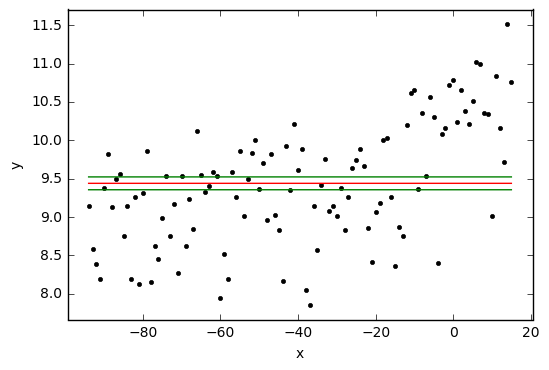

In [5]:
print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )

plotFit( year, temp, mdl, ftr=fitter )

Try higher order polynomials to see which one is best.

Parameters : [    9.988    0.014]
StDevs     : [    0.099    0.002]
Scale      :     0.648
Evidence   :   -54.889


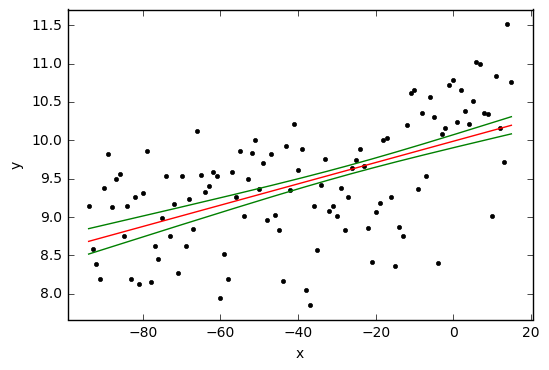

In [6]:
mdl = PolynomialModel( 1 )

fitter = Fitter( year, mdl )
param = fitter.fit( temp )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )

plotFit( year, temp, mdl, ftr=fitter )

The logEvidence increased by 0.8 (=27.67-26.87). So the linear model is bettter by a factor 10^0.8 = 6.31.  

Parameters : [   10.103    0.030    0.000]
StDevs     : [    0.101    0.006    0.000]
Scale      :     0.622
Evidence   :   -57.868
Covar matrix :
[[    0.010    0.000    0.000]
 [    0.000    0.000    0.000]
 [    0.000    0.000    0.000]]


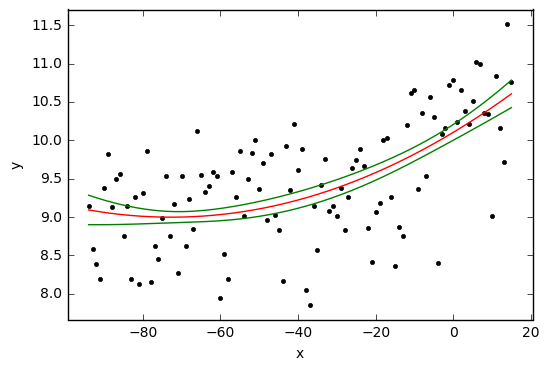

In [7]:
mdl = PolynomialModel( 2 )

fitter = Fitter( year, mdl )
param = fitter.fit( temp )

print( "Parameters :", fmt( param, max=None ) )
print( "StDevs     :", fmt( fitter.stdevs, max=None ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-10,10], noiseLimits=[0.01,10] ) ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

plotFit( year, temp, mdl, ftr=fitter )

The logEvidence has gone down again. So this quadratic model is not better than the linear one.